In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid/Tungro/TUNGRO2_247.JPG
/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid/Tungro/TUNGRO2_124.JPG
/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid/Tungro/TUNGRO3_037.jpg
/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid/Tungro/TUNGRO2_148.JPG
/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid/Tungro/TUNGRO3_002.jpg
/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid/Tungro/TUNGRO2_010.jpg
/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid/Tungro/TUNGRO2_184.JPG
/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid/Tungro/TUNGRO2_157.JPG
/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid/Tungro/TUNGRO2_029.jpg
/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid/Tungro/TUNGRO2_142.JPG
/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid/

In [4]:
pip install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=017d0abcda4182b744c72bbdfa4e6bedb0e84087dfcd8fd2565fe67b391a9e5b
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install albumentations

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import torch
import numpy as np
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imutils
import cv2
import PIL.Image
import os

2024-06-04 10:53:36.290590: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 10:53:36.290716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 10:53:36.570038: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


ModuleNotFoundError: No module named 'imutils'

In [ ]:
import os
import cv2
import albumentations as A
from tqdm import tqdm 

def process_and_augment_images(input_dir, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Define augmentation pipeline
    transform = A.Compose([
        A.Rotate(limit=15, p=0.5),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
        A.HorizontalFlip(p=0.8),
        A.VerticalFlip(p=0.8),
        A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
        A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
        A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=0.5),


    ])

    # Process and augment images
    for img_name in tqdm(os.listdir(input_dir)):
        img_path = os.path.join(input_dir, img_name)
        image = cv2.imread(img_path)

        # Convert BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Apply augmentation to the image
        augmented_images = [transform(image=image)['image'] for _ in range(5)]

        # Save augmented images to output directory
        for i, augmented_img in enumerate(augmented_images):
            augmented_img_bgr = cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR)  # Convert back to BGR for saving
            output_path = os.path.join(output_dir, f"{img_name[:-4]}_{i}.jpg")
            cv2.imwrite(output_path, augmented_img_bgr)


In [ ]:
input_folders = ['/kaggle/input/rice-diseases-image-dataset/RiceDiseaseDataset/train/BrownSpot','/kaggle/input/rice-diseases-image-dataset/RiceDiseaseDataset/train/Healthy','/kaggle/input/rice-diseases-image-dataset/RiceDiseaseDataset/train/Hispa','/kaggle/input/rice-diseases-image-dataset/RiceDiseaseDataset/train/LeafBlast']

In [ ]:
output_folders = ['/kaggle/working/Test/BrownSpot','/kaggle/working/Test/Healthy','/kaggle/working/Test/Hispa','/kaggle/working/Test/LeafBlast']

In [ ]:
for i in range(4):
    process_and_augment_images(input_folders[i],output_folders[i])
    

In [ ]:
import shutil
shutil.rmtree("/kaggle/working/Test")

In [ ]:
input_path = '/kaggle/input/rice-diseases-image-dataset/RiceDiseaseDataset/validation/Hispa'
output = '/kaggle/working/test/ki'
process_and_augment_images(input_path,output)

In [103]:
dataset_folder_path = '/kaggle/input/rice-leaf-dataset-from-mendeley-data/Rice Leaf Disease Images/Bacterialblight'
train_output_path = '/kaggle/working/Test/Bacterialblight' # Specify your desired output path
valid_output_path = '/kaggle/working/Valid/Bacterialblight'  # Specify your desired output path
split_dataset(dataset_folder_path, train_output_path=train_output_path, valid_output_path=valid_output_path)


Dataset split into train and valid sets successfully!


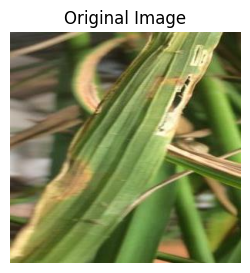

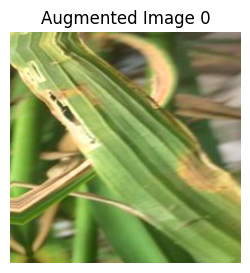

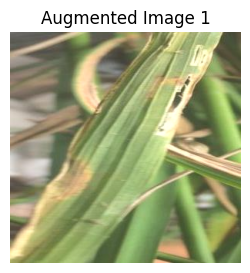

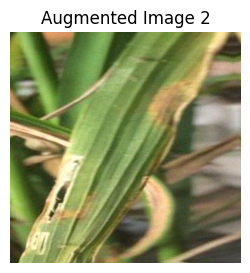

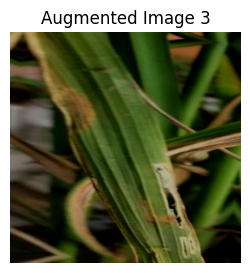

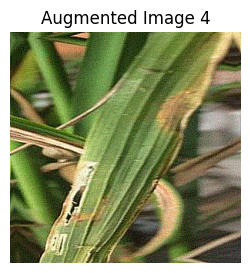

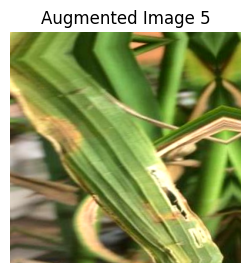

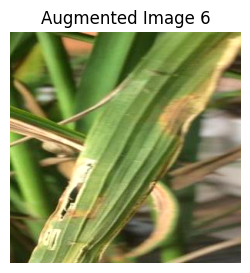

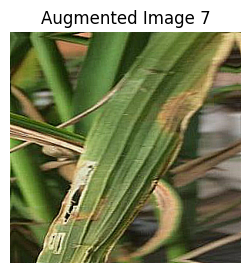

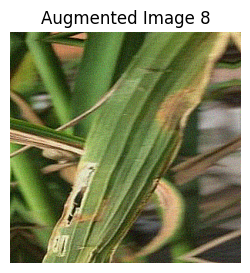

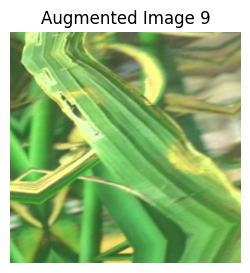

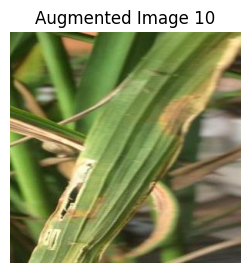

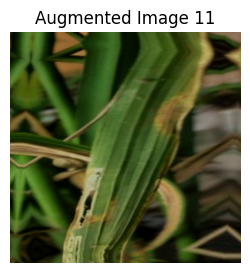

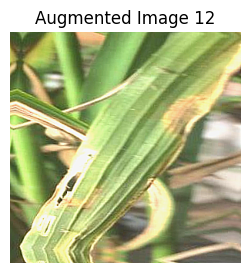

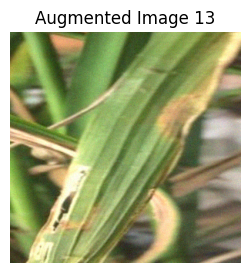

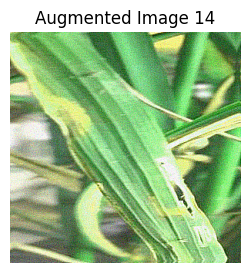

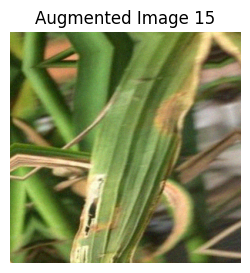

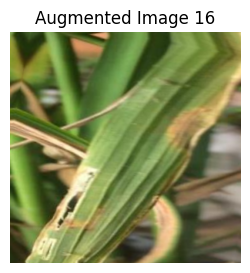

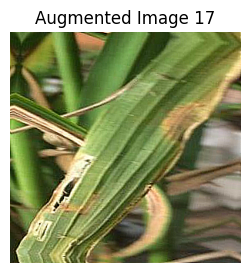

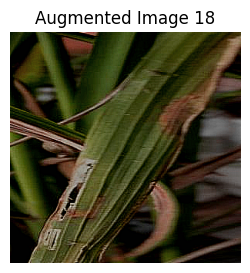

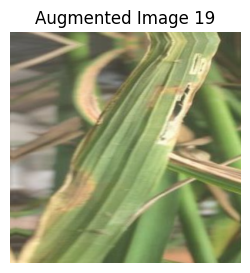

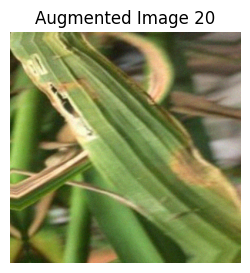

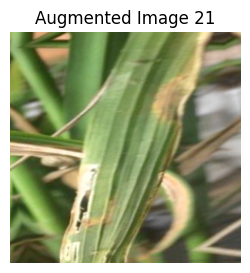

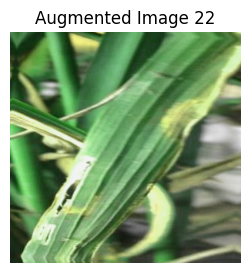

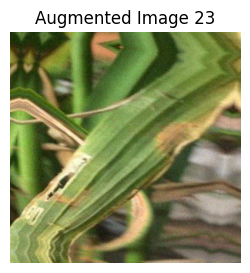

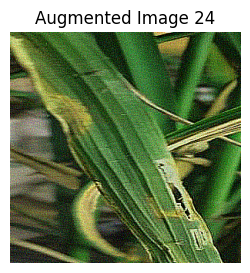

In [17]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt

# Define augmentation pipeline
transform = A.Compose([
    A.Rotate(limit=15, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.HorizontalFlip(p=0.8),
    A.VerticalFlip(p=0.8),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
    A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=0.5),
    
    
])

def apply_transformations_to_image(image_path):
    # Read and process the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to read image: {image_path}")
        return

    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the original image
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Apply augmentation to the image
    augmented_images = [transform(image=image)['image'] for _ in range(25)]

    # Display augmented images
    for i, augmented_img in enumerate(augmented_images):
        plt.figure(figsize=(3, 3))
        plt.imshow(augmented_img)
        plt.title(f"Augmented Image {i}")
        plt.axis('off')
        plt.show()

# Example usage
image_path = '/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Train/Bacterialblight/BACTERAILBLIGHT4_234.JPG'  # Replace with the path to your image
apply_transformations_to_image(image_path)


In [ ]:
import shutil
import os

def zip_folder(folder_path, output_path):
    # Create a zip archive from the specified folder
    shutil.make_archive(output_path, 'zip', folder_path)
    print(f"Folder '{folder_path}' has been zipped into '{output_path}.zip'")

# Example usage
folder_path = '/kaggle/working/test/ki'  # Replace with the path to your folder
output_path = '/kaggle/working/test/kizip'  # Replace with the desired output path (without .zip extension)

zip_folder(folder_path, output_path)


In [127]:
#Transforms
transformer_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.4673, 0.4946, 0.2867],
                        [0.2011, 0.1805, 0.1548])
   
   
])

transformer_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.4673, 0.4946, 0.2867],
                        [0.2011, 0.1805, 0.1548])
])

In [134]:
import torch
from torchvision import transforms
from PIL import Image

# Define a transform to convert the image to a tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load an image
image_path = '/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Train/Tungro/TUNGRO1_001.jpg'  # Replace with your image path
image = Image.open(image_path)

# Apply the transform to the image
image_tensor = transform(image)

print(image_tensor)

# Calculate the mean and standard deviation of each color channel
mean = image_tensor.mean(dim=(1, 2))
std = image_tensor.std(dim=(1, 2))

# Print the mean and standard deviation
print("Mean:", mean)
print("Standard Deviation:", std)

tensor([[[0.2980, 0.3333, 0.3451,  ..., 0.3686, 0.0980, 0.2196],
         [0.2824, 0.3059, 0.3451,  ..., 0.1922, 0.1569, 0.1843],
         [0.2902, 0.2941, 0.3412,  ..., 0.0824, 0.2196, 0.1961],
         ...,
         [0.4510, 0.4667, 0.4863,  ..., 0.4745, 0.5333, 0.5137],
         [0.4353, 0.4275, 0.4431,  ..., 0.5020, 0.5490, 0.5020],
         [0.4588, 0.4275, 0.4353,  ..., 0.5294, 0.5686, 0.4902]],

        [[0.5373, 0.5451, 0.4941,  ..., 0.5529, 0.2745, 0.3843],
         [0.5216, 0.5176, 0.4941,  ..., 0.3765, 0.3333, 0.3529],
         [0.5294, 0.5098, 0.4980,  ..., 0.2627, 0.3882, 0.3569],
         ...,
         [0.6157, 0.6314, 0.6510,  ..., 0.3137, 0.3843, 0.3765],
         [0.5961, 0.5961, 0.6039,  ..., 0.3529, 0.4039, 0.3647],
         [0.6078, 0.5882, 0.5843,  ..., 0.3804, 0.4314, 0.3647]],

        [[0.2667, 0.3020, 0.3098,  ..., 0.2784, 0.0039, 0.1255],
         [0.2510, 0.2745, 0.3098,  ..., 0.1020, 0.0627, 0.0824],
         [0.2549, 0.2549, 0.3020,  ..., 0.0000, 0.1098, 0.

In [135]:
image_tensor = transformer_test(image)
mean = image_tensor.mean(dim=(1, 2))
std = image_tensor.std(dim=(1, 2))

# Print the mean and standard deviation
print("Mean:", mean)
print("Standard Deviation:", std)

Mean: tensor([0.2213, 0.4309, 0.6927])
Standard Deviation: tensor([0.8356, 0.7527, 1.1176])


In [74]:
train_path = '/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Train'
test_path = '/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid'

In [137]:
#Data Loader
train_loader = DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform = transformer_train),
    batch_size = 32, shuffle = True
    
)

test_loader = DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform = transformer_test),
    batch_size = 32, shuffle = True
)

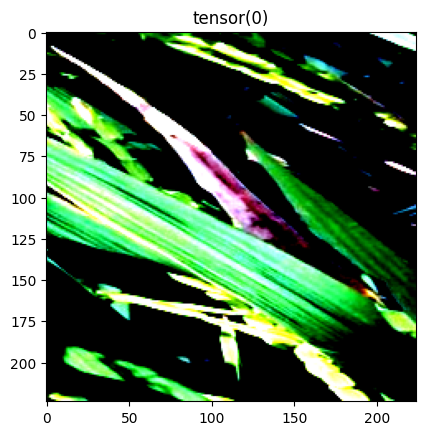

In [138]:
import matplotlib.pyplot as plt

# Assume 'test_loader' is your PyTorch DataLoader

# Get a batch of images from the DataLoader
images, labels = next(iter(test_loader))

# Plot a single image
plt.imshow(images[31].permute(1, 2, 0))
plt.title(labels[31])
plt.show()

In [139]:
root = pathlib.Path(train_path)
classes = sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [140]:
print(classes)

['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']


In [141]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvoluNet(nn.Module):
    def __init__(self, num_classes=4):
        super(ConvoluNet, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)  # (batch_size, 32, 224, 224)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)  # (batch_size, 64, 224, 224)
        self.relu2 = nn.ReLU()  # (batch_size, 64, 224, 224)
        self.bn2 = nn.BatchNorm2d(64)  # (batch_size, 64, 224, 224)
        self.pool2 = nn.MaxPool2d(kernel_size=2)  # (batch_size, 64, 112, 112)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)  # (batch_size, 128, 112, 112)
        self.relu3 = nn.ReLU()  # (batch_size, 128, 112, 112)
        self.bn3 = nn.BatchNorm2d(128)  # (batch_size, 128, 112, 112)
        self.pool3 = nn.MaxPool2d(kernel_size=2)  # (batch_size, 128, 56, 56)

        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)  # (batch_size, 256, 56, 56)
        self.relu4 = nn.ReLU()  # (batch_size, 256, 56, 56)
        self.bn4 = nn.BatchNorm2d(256)  # (batch_size, 256, 56, 56)
        self.pool4 = nn.MaxPool2d(kernel_size=2)  # (batch_size, 256, 28, 28)

        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)  # (batch_size, 512, 28, 28)
        self.relu5 = nn.ReLU()  # (batch_size, 512, 28, 28)
        self.bn5 = nn.BatchNorm2d(512)  # (batch_size, 512, 28, 28)
        self.pool5 = nn.MaxPool2d(kernel_size=2)  # (batch_size, 512, 14, 14)

        self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)  # (batch_size, 512, 14, 14)
        self.relu6 = nn.ReLU()  # (batch_size, 512, 14, 14)
        self.bn6 = nn.BatchNorm2d(512)  # (batch_size, 512, 14, 14)
        self.pool6 = nn.MaxPool2d(kernel_size=2)  # (batch_size, 512, 7, 7)

        self.dropout = nn.Dropout(p=0.25)  # (batch_size, 512, 7, 7)

        self.flatten = nn.Flatten()  # (batch_size, 512 * 7 * 7 = 25088)

        self.fc1 = nn.Linear(in_features=7 * 7 * 512, out_features=1024)  # (batch_size, 1024)
        self.relu_fc1 = nn.ReLU()  # (batch_size, 1024)
        self.bn_fc1 = nn.BatchNorm1d(1024)  # (batch_size, 1024)
        
        self.fc2 = nn.Linear(in_features=1024, out_features=512)  # (batch_size, 512)
        self.relu_fc2 = nn.ReLU()  # (batch_size, 512)
        self.bn_fc2 = nn.BatchNorm1d(512)  # (batch_size, 512)
      
        self.fc3 = nn.Linear(in_features=512, out_features=256)  # (batch_size, 256)
        self.relu_fc3 = nn.ReLU()  # (batch_size, 256)
        self.bn_fc3 = nn.BatchNorm1d(256)  # (batch_size, 256)
        
        self.fc4 = nn.Linear(in_features=256, out_features=128)  # (batch_size, 128)
        self.relu_fc4 = nn.ReLU()  # (batch_size, 128)
        self.bn_fc4 = nn.BatchNorm1d(128)  # (batch_size, 128)
     
        self.fc5 = nn.Linear(in_features=128, out_features=32)  # (batch_size, 32)
        self.relu_fc5 = nn.ReLU()  # (batch_size, 32)
        self.bn_fc5 = nn.BatchNorm1d(32)  # (batch_size, 32)

        self.fc6 = nn.Linear(in_features=32, out_features=num_classes)  # (batch_size, num_classes)
        
    def forward(self, input):
        output = self.conv1(input)  # (batch_size, 32, 224, 224)
        output = self.conv2(output)  # (batch_size, 64, 224, 224)
        output = self.relu2(output)  # (batch_size, 64, 224, 224)
        output = self.bn2(output)  # (batch_size, 64, 224, 224)
        output = self.pool2(output)  # (batch_size, 64, 112, 112)
    
        output = self.conv3(output)  # (batch_size, 128, 112, 112)
        output = self.relu3(output)  # (batch_size, 128, 112, 112)
        output = self.bn3(output)  # (batch_size, 128, 112, 112)
        output = self.pool3(output)  # (batch_size, 128, 56, 56)
     
        output = self.conv4(output)  # (batch_size, 256, 56, 56)
        output = self.relu4(output)  # (batch_size, 256, 56, 56)
        output = self.bn4(output)  # (batch_size, 256, 56, 56)
        output = self.pool4(output)  # (batch_size, 256, 28, 28)

        output = self.conv5(output)  # (batch_size, 512, 28, 28)
        output = self.relu5(output)  # (batch_size, 512, 28, 28)
        output = self.bn5(output)  # (batch_size, 512, 28, 28)
        output = self.pool5(output)  # (batch_size, 512, 14, 14)

        output = self.conv6(output)  # (batch_size, 512, 14, 14)
        output = self.relu6(output)  # (batch_size, 512, 14, 14)
        output = self.bn6(output)  # (batch_size, 512, 14, 14)
        output = self.pool6(output)  # (batch_size, 512, 7, 7)

        output = self.dropout(output)  # (batch_size, 512, 7, 7)

        output = self.flatten(output)  # (batch_size, 25088)

        output = self.fc1(output)  # (batch_size, 1024)
        output = self.relu_fc1(output)  # (batch_size, 1024)
        output = self.bn_fc1(output)  # (batch_size, 1024)
     
        output = self.fc2(output)  # (batch_size, 512)
        output = self.relu_fc2(output)  # (batch_size, 512)
        output = self.bn_fc2(output)  # (batch_size, 512)
  
        output = self.fc3(output)  # (batch_size, 256)
        output = self.relu_fc3(output)  # (batch_size, 256)
        output = self.bn_fc3(output)  # (batch_size, 256)

        output = self.fc4(output)  # (batch_size, 128)
        output = self.relu_fc4(output)  # (batch_size, 128)
        output = self.bn_fc4(output)  # (batch_size, 128)
 
        output = self.fc5(output)  # (batch_size, 32)
        output = self.relu_fc5(output)  # (batch_size, 32)
        output = self.bn_fc5(output)  # (batch_size, 32)
          
        output = self.fc6(output)  # (batch_size, num_classes)

        # No need for softmax here if using CrossEntropyLoss
        # output = F.softmax(output, dim=1)  # (batch_size, num_classes)

        return output


In [142]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [143]:
model = ConvoluNet(num_classes =4).to(device)

In [144]:

optimizer=Adam(model.parameters(),lr=0.001,weight_decay=1e-5)
loss_function=nn.CrossEntropyLoss()

In [145]:
train_path = '/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Train'
test_path = '/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Valid'
import glob
#calculating the size of training and testing images
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))

print(test_count)


1418


In [146]:
import os

def count_images(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg')):
                total_images += 1
    return total_images


train_count = count_images(train_path)
test_count = count_images(test_path)

print(f"Number of train images: {train_count}")
print(f"Number of test images: {test_count}")

Number of train images: 3944
Number of test images: 1988


In [147]:
print(test_count)

1988


In [148]:
epochs = 10

In [149]:
from tqdm import tqdm


def train(model, optimizer, loss_function, train_loader, epoch, epochs, train_count):
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0

    train_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}', leave=False)

    for i, (images, labels) in enumerate(train_bar):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        optimizer.zero_grad()

        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.cpu().item() * images.size(0)  
        _, prediction = torch.max(outputs.data, 1)
        train_accuracy += torch.sum(prediction == labels.data).item()

        train_bar.set_postfix(train_loss=train_loss, train_accuracy=train_accuracy)

    train_accuracy = train_accuracy / train_count
    train_loss = train_loss / train_count

    return train_loss, train_accuracy

def test(model, test_loader, test_count):
    model.eval()
    test_accuracy = 0.0
    test_loss = 0.0

    for i, (images, labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        outputs = model(images)
        loss = loss_function(outputs, labels)
        test_loss += loss.item() * images.size(0)
        
        _, prediction = torch.max(outputs.data, 1)
        test_accuracy += torch.sum(prediction == labels.data).item()

    test_loss = test_loss / test_count
    test_accuracy = test_accuracy / test_count

    return test_loss, test_accuracy


In [150]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from tqdm import tqdm

def train(model, optimizer, loss_function, train_loader, epoch, epochs, train_count):
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0

    train_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}', leave=False)

    for i, (images, labels) in enumerate(train_bar):
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.cpu().item() * images.size(0)  
        _, prediction = torch.max(outputs.data, 1)
        train_accuracy += torch.sum(prediction == labels.data).item()

        train_bar.set_postfix(train_loss=train_loss / ((i + 1) * images.size(0)), train_accuracy=train_accuracy / ((i + 1) * images.size(0)))

    train_accuracy = train_accuracy / train_count
    train_loss = train_loss / train_count

    return train_loss, train_accuracy

def test(model, test_loader, test_count, loss_function):
    model.eval()
    test_accuracy = 0.0
    test_loss = 0.0

    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
            if torch.cuda.is_available():
                images = images.cuda()
                labels = labels.cuda()

            outputs = model(images)
            loss = loss_function(outputs, labels)
            test_loss += loss.item() * images.size(0)
            
            _, prediction = torch.max(outputs.data, 1)
            test_accuracy += torch.sum(prediction == labels.data).item()

    test_loss = test_loss / test_count
    test_accuracy = test_accuracy / test_count

    return test_loss, test_accuracy


In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store values
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

best_accuracy = 0.0

for epoch in range(epochs):
    train_loss, train_accuracy = train(model, optimizer, loss_function, train_loader, epoch, epochs, train_count)
    test_loss, test_accuracy = test(model, test_loader, test_count, loss_function)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print('Epoch: ' + str(epoch + 1) + ' Train Loss: ' + str(train_loss) + ' Train Accuracy: ' + str(train_accuracy) + ' Test Accuracy: ' + str(test_accuracy))

    if test_accuracy > best_accuracy:
        torch.save(model.state_dict(), 'best_checkpoint.model')
        best_accuracy = test_accuracy


Epoch: 1 Train Loss: 0.5570419199810067 Train Accuracy: 0.8032454361054767 Test Accuracy: 0.9064386317907445


Epoch 2/10:  54%|█████▍    | 67/124 [00:25<00:21,  2.66it/s, train_accuracy=0.886, train_loss=0.342]

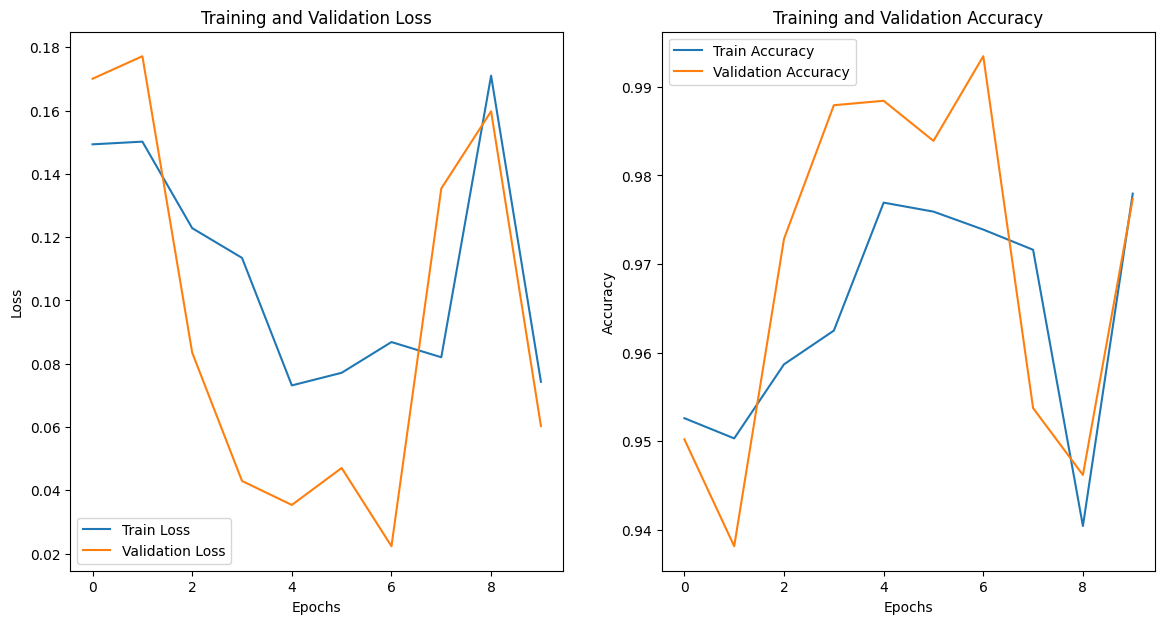

In [110]:
epochs_range = range(epochs)

plt.figure(figsize=(14, 7))

# Plot Train and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, test_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Train and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, test_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

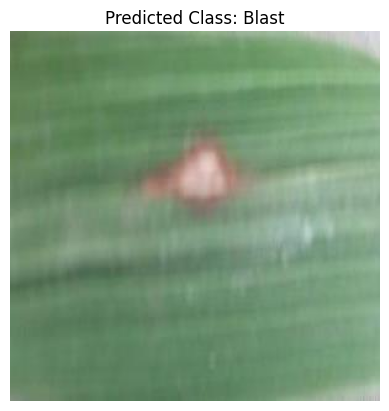

In [113]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as transforms

# Load the model
model = ConvoluNet(num_classes=4)
model.load_state_dict(torch.load('best_checkpoint.model'))
model.eval()

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

# Function to predict class labels
def predict_image(image_path):
    image = Image.open(image_path)
    image_tensor = transform(image).unsqueeze(0)  
    outputs = model(image_tensor)
    _, predicted = torch.max(outputs, 1)
    return predicted.item()

# Upload and validate a picture
uploaded_image_path = '/kaggle/input/rice-leaf-disease-images/Rice Leaf Disease Images/Train/Blast/BLAST4_019.jpg'  
predicted_class = predict_image(uploaded_image_path)

if predicted_class == 1:
  classification = 'Bacterialblight'
elif predicted_class == 2:
  classification = 'Blast'
elif predicted_class == 3: 
  classification = 'Brownspot'
else:
  classification = 'Tungro'


# Display the uploaded picture and predicted class label
image = Image.open(uploaded_image_path)
plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted Class: {classification}')
plt.show()